# Contributions

Dexter (Tat Hei) Tsin:

Spencer Young:

Yosef:

# Abstract

We mined gene expression and electrophysiology data for the anterolateral area (AL) and the posteromedial (PM) area of the mice visual cortex from the Allen Brain Observatory and the Allen Cell Types Database and proceeded to plot this data. We found that the PM area expressed genes that play an integral role in the transport of molecules and ions into and out of the cell while the AL area expressed no such genes. We also found that the resting membrane potential of the two regions are very similar with the median resting potential of the AL area being -71 mV and the median resting potential of the PM area being -72 mV, and we observed a similar trend in the positive correlation between the fast trough depth vs. the upstroke-downstroke ratio of the two areas. Finally, we found that both areas of the visual cortex have very similar number of direction selective cells with the AL having 169 and the PM having 171 and both areas of the visual cortex have similar number of cells with a signal response to drifting gratings with the AL having 3517 and the PM having 3220. 

# Research Question

How do differences in gene expression, upstroke downstroke ratio, resting membrane potential, and directional selectivity lead to the genetic differentiation and functional specialization between the anterolateral area (AL) and the posteromedial area (PM) in higher visual areas of the mice?

# Background and Prior Work

Uncovering the mechanisms behind the flow and processing of visual information is a difficult problem, yet one that is fundamental to understanding the sensory systems as a whole. A necessary step toward the detailed study of the visual hierarchy is a thorough characterization of boundaries and visual field representations.[1] Mouse brains are made up of many millions of cells called neurons that are interconnected to form neuronal circuits.[2] Neurons that express similar genes tend to look and have electrophysiological alike, whereas neurons that express different genes tend to be dissimilar. [2] We want to determine which genes and the resulting functional specialization are expressed in groups of neurons that represent the many cell types found in many parts of the brain, including the visual cortex.[1]

Specialized neural circuits process visual information in parallel hierarchical streams, leading to complex visual perception and behavior.[3] Distinct channels of visual information begin in the retina of the eye and synapse through the lateral geniculate nucleus to the primary visual cortex (V1), forming the building blocks for visual perception.[3] In this proposal, we are comparing the differences of the anterolateral area (AL) and the posteromedial (PM) area in higher visual areas of mice's visual cortex. Anderman et al. found that the anterolateral area (AL) of the visual cortex responsible for guiding behavior involving fast-moving stimuli and the posteromedial(PM) area helps guide behavior involving slow-moving objects. [3] These behaviors are critical in understanding higher-order cognition, a complex area of thinking which refers to the mental processes of reasoning, decision making, and creativity, etc. Zariwala, Hatim A., et al. looked at the genetic differences in the visual cortex with cre-transgenic mice.[4] 

The data sets that we are working with Allen Brain Observatory and Allen Cell Type data. The Allen Brain Observatory is data for how visual stimuli are represented by neural activity in the mouse visual cortex in both single cells and populations. A calcium imaging for different mouse cre lines with calcium reporter was analyzed during exposure to five classical visual stimuli: Drifting Gratings, Static Gratings, Natural Scenes, Natural Movies, Locally Sparse Noise. There are 30 experiments with the drifting gradient for both visual cortex regions that have data for directional selective, differential response to the direction of a visual stimulus. The Allen Brain Observatory provides a dataset to survey information encoding in the visual cortex. The Allen Cell Type data is data from a single neuron from mice and humans from electrophysiological, morphological, and transcriptomic data. For electrophysiology data, the researchers did a whole-cell patch-clamp recording to find upstroke and downstroke for over 2,000 neurons. The transcriptomic data is collected using an RNA sequence of single cells. The gene transcripts are isolated from whole cells or nuclei, amplified, and sequenced, and then aligned to a reference genome. There is data for gene expression for 2,000 genes in both the anterolateral area (AL) and the posteromedial area (PM). 


## References (include links):
(1) Wang, Q., & Burkhalter, A. (2007). Area map of mouse visual cortex. The Journal of Comparative Neurology, 502(3), 339–357. doi:10.1002/cne.21286 https://www.ncbi.nlm.nih.gov/pubmed/17366604

(2) de Vries, S.E.J., Lecoq, J.A., Buice, M.A. et al. A large-scale standardized physiological survey reveals functional organization of the mouse visual cortex. Nat Neurosci 23, 138–151 (2020). https://doi.org/10.1038/s41593-019-0550-9

(3) Andermann, Mark L et al. “Functional specialization of mouse higher visual cortical areas.” Neuron vol. 72,6 (2011): 1025-39. doi:10.1016/j.neuron.2011.11.013 https://www.ncbi.nlm.nih.gov/pubmed/22196337

(4) Zariwala, Hatim A., et al. "Visual tuning properties of genetically identified layer 2/3 neuronal types in the primary visual cortex of cre-transgenic mice." Frontiers in systems neuroscience 4 (2011): 162.https://www.ncbi.nlm.nih.gov/pubmed/21283555



# Hypothesis


We hypothesize that the anterolateral area and the posteromedial area will be dissimilar in gene expression because the anterolateral area of the visual cortex should have a gene expression pattern that will allow for it to guide behavior involving fast moving stimuli while the posteromedial area should have a gene expression pattern that will allow for it to guide behavior involving slow moving objects. We also expect the electrophysiological features of the two brain areas to be dissimilar. The resting membrane potential and upstroke-downstroke ratio vs. fast trough depth trend is expected to be different between the two areas because neurons that express different genes tend to have electrophysiological characteristics that are dissimilar. 

# Code
## Set-up
*The packages and datasets required in this project is provided below*

In [1]:
# Importing required packages for the project
import io
import json
import requests
import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import allensdk.brain_observatory.stimulus_info as stim_info

from sklearn.decomposition import PCA  
from pandas.io.json import json_normalize
from scipy.spatial.distance import pdist, squareform
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.rma_api import RmaApi

# Set up style and palette for seaborn plot
sns.set(style="darkgrid")
sns.set_palette("bright")

Download required mouse data from Allen Cell Types Database

In [2]:
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
mouse_df = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.MOUSE]))

### Import CSV including ISH gene expression data from the two structures

#### Approach:

1. Did query search on Allen ISH data
2. Download as .xml format, then convert it into .csv format through online platform
3. Uploaded into the folder as "VISal_VISpm_Converted_No_Threshold.csv" and "VISpm_VISal_Converted_No_Threshold.csv"


The query search is provided below:
http://api.brain-map.org/api/v2/data/query.xml?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq402][structures2$eq533]

http://api.brain-map.org/api/v2/data/query.xml?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq533][structures2$eq402]

Visual AnteriorLateral Area : Structure.id = 533

Visual PosteriorMedial Area : Structure.id = 402

Primary Visual Cortex: Structure.id = 385

Visual Areas: Structure.id = 669

Basic Cell groups: Structure.id = 8


#### Package all the api requests that will implement differential search of structures in Allen database.

In [3]:
PM_AL_API = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq402][structures2$eq533]"
AL_PM_API = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq533][structures2$eq402]"
NL_AL_API = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq533][structures2$eq385]"
NL_PM_API = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_differential[set$eq'mouse'][structures1$eq402][structures2$eq385]"

#### Request the genetic data from Allen API service, then converting all the json data into pandas dataframe

In [4]:
PM_AL = requests.get(PM_AL_API)
PM_AL_json = PM_AL.json()
PM_AL_json_processed = PM_AL_json['msg']
new_columns = list(PM_AL_json_processed[0].keys())
VISpm_VISal_pd = pd.DataFrame(columns = new_columns)

for dictionaries in PM_AL_json_processed:
    gene_list = pd.DataFrame(list(dictionaries.items())).transpose()
    gene_list.columns = gene_list.loc[0]
    gene_list = pd.DataFrame(gene_list.drop(0))
    VISpm_VISal_pd = pd.concat([VISpm_VISal_pd, gene_list])
    
AL_PM = requests.get(AL_PM_API)
AL_PM_json = AL_PM.json()
AL_PM_json_processed = AL_PM_json['msg']
new_columns = list(AL_PM_json_processed[0].keys())
VISal_VISpm_pd = pd.DataFrame(columns = new_columns)

for dictionaries in AL_PM_json_processed:
    gene_list = pd.DataFrame(list(dictionaries.items())).transpose()
    gene_list.columns = gene_list.loc[0]
    gene_list = pd.DataFrame(gene_list.drop(0))
    VISal_VISpm_pd = pd.concat([VISal_VISpm_pd, gene_list])
    
NL_AL = requests.get(NL_AL_API)
NL_AL_json = NL_AL.json()
NL_AL_json_processed = NL_AL_json['msg']
new_columns = list(NL_AL_json_processed[0].keys())
NL_VISal_pd = pd.DataFrame(columns = new_columns)

for dictionaries in NL_AL_json_processed:
    gene_list = pd.DataFrame(list(dictionaries.items())).transpose()
    gene_list.columns = gene_list.loc[0]
    gene_list = pd.DataFrame(gene_list.drop(0))
    NL_VISal_pd = pd.concat([NL_VISal_pd, gene_list])
    
NL_PM = requests.get(NL_PM_API)
NL_PM_json = NL_PM.json()
NL_PM_json_processed = NL_PM_json['msg']
new_columns = list(NL_PM_json_processed[0].keys())
NL_VISpm_pd = pd.DataFrame(columns = new_columns)

for dictionaries in NL_PM_json_processed:
    gene_list = pd.DataFrame(list(dictionaries.items())).transpose()
    gene_list.columns = gene_list.loc[0]
    gene_list = pd.DataFrame(gene_list.drop(0))
    NL_VISpm_pd = pd.concat([NL_VISpm_pd, gene_list])

### Accessing Brain Observatory data
Download a list of all targeted areas

In [5]:
boc = BrainObservatoryCache(manifest_file='/datasets/allen-brain-observatory/visual-coding-2p/manifest.json')
targeted_structures = boc.get_all_targeted_structures()

### Accessing Neuropixels Data

In [6]:
# We have all of this data on the datahub! This is where it lives.
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

# Create the EcephysProjectCache object
cache = EcephysProjectCache.fixed(manifest=manifest_path)

# Get the sessions available in this dataset
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))

Total number of sessions: 58


### Accessing Mouse Connectivity Data

In [7]:
mcc = MouseConnectivityCache()
structure_tree = mcc.get_structure_tree()
id_acronym = structure_tree.get_id_acronym_map()

## Data Wrangling

### Handling Genetic Data


Extract the gene symbols and related fold change from the pd dataframe

In [8]:
VISal_VISpm_pd_fold = VISal_VISpm_pd[['gene-symbol', 'fold-change']]
VISal_VISpm_length = VISal_VISpm_pd_fold.shape[0]

VISpm_VISal_pd_fold = VISpm_VISal_pd[['gene-symbol', 'fold-change']]
VISpm_VISal_pd_length = VISpm_VISal_pd_fold.shape[0]

NL_VISal_pd_fold = NL_VISal_pd[['gene-symbol', 'fold-change']]
NL_VISal_length = NL_VISal_pd_fold.shape[0]

NL_VISpm_pd_fold = NL_VISpm_pd[['gene-symbol', 'fold-change']]
NL_VISpm_length = NL_VISpm_pd_fold.shape[0]

Change all the fold change data into numeric data for later analysis

In [9]:
NL_VISal_pd_fold.loc[:,('fold-change')] = pd.to_numeric(NL_VISal_pd_fold.loc[:,('fold-change')]).copy()
NL_VISpm_pd_fold.loc[:,('fold-change')] = pd.to_numeric(NL_VISpm_pd_fold.loc[:,('fold-change')]).copy()
VISpm_VISal_pd_fold.loc[:,('fold-change')] = pd.to_numeric(VISpm_VISal_pd_fold.loc[:,('fold-change')]).copy()
VISal_VISpm_pd_fold.loc[:,('fold-change')] = pd.to_numeric(VISal_VISpm_pd_fold.loc[:,('fold-change')]).copy()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Merge mouse id dataframe with the elctrophysiology features

In [10]:
mouse_df = mouse_df.set_index('id')
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
mouse_ephys_df = mouse_df.join(ephys_features, how ='inner')
ephys_columns = list(ephys_features.columns)

### Further selecting data for dimensionality reduction through PCA

Selecting Data for analysing Resting Potential data from cell types database

In [11]:
visal_ephys_data = mouse_ephys_df.loc[mouse_ephys_df["structure_area_abbrev"] == "VISal"].copy()
print(visal_ephys_data.shape[0])
visal_ephys_vrest = pd.DataFrame(visal_ephys_data.loc[:, 'vrest'].copy())
visal_ephys_vrest.columns = ['Vrest']
visal_column = np.repeat("VISal", visal_ephys_vrest.shape[0])
visal_ephys_vrest['Brain Region'] = visal_column
visal_ephys_data['Brain Region'] = visal_column

vispm_ephys_data = mouse_ephys_df.loc[mouse_ephys_df["structure_area_abbrev"] == "VISpm"].copy()
print(vispm_ephys_data.shape[0])
vispm_ephys_vrest = pd.DataFrame(vispm_ephys_data.loc[:, 'vrest'].copy())
vispm_ephys_vrest.columns = ['Vrest']
vispm_column = np.repeat("VISpm", vispm_ephys_vrest.shape[0])
vispm_ephys_vrest['Brain Region'] = vispm_column
vispm_ephys_data['Brain Region'] = vispm_column

vrest = pd.concat([visal_ephys_vrest, vispm_ephys_vrest])
vis_alpm_data = pd.concat([visal_ephys_data, vispm_ephys_data])

17
89


Pre-processing of the ephys-data dataframe before running PCA
1. Seperating the dataframe into VISal and VISpm cells
2. Dropping columns that are non-numerical
3. Dropping columns that have N/A entries

In [12]:
cell_list = ['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere',
       'normalized_depth']
visal_ephys_data = visal_ephys_data.drop(cell_list, axis = 1)
vispm_ephys_data = vispm_ephys_data.drop(cell_list, axis = 1)

ephys_list =['adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square',
       'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'threshold_i_long_square', 'threshold_i_ramp',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_ramp', 'threshold_t_short_square',
       'threshold_v_long_square', 'threshold_v_ramp',
       'threshold_v_short_square', 'thumbnail_sweep_id',
       'trough_t_long_square', 'trough_t_ramp', 'trough_t_short_square',
       'trough_v_long_square', 'trough_v_ramp', 'trough_v_short_square',
       'upstroke_downstroke_ratio_long_square',
       'upstroke_downstroke_ratio_ramp',
       'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest']

visal_ephys_data = visal_ephys_data.loc[:, ephys_list]
vispm_ephys_data = vispm_ephys_data.loc[:, ephys_list]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = mouse_ephys_df.select_dtypes(include=numerics)
newdf = newdf.drop(['structure_area_id', 'donor_id', 'normalized_depth', 'electrode_0_pa'], 1)
newdf = newdf.dropna(axis=0).dropna(axis=1)

visal_ephys_data = visal_ephys_data.dropna(axis=0).dropna(axis=1)
visal_ephys_num = visal_ephys_data.select_dtypes(include=numerics)
visal_ephys_name = visal_ephys_num.copy()
visal_column = np.repeat("VISal", visal_ephys_name.shape[0])
visal_ephys_name['Brain Region'] = visal_column

vispm_ephys_data = vispm_ephys_data.dropna(axis=0).dropna(axis=1)
vispm_ephys_num = vispm_ephys_data.select_dtypes(include=numerics)
vispm_ephys_name = vispm_ephys_num.copy()

vispm_column = np.repeat("VISpm", vispm_ephys_name.shape[0])
vispm_ephys_name['Brain Region'] = vispm_column

visalpm_ephys = pd.concat([visal_ephys_num,vispm_ephys_num])
visalpm_ephys_name = pd.concat([visal_ephys_name, vispm_ephys_name])
visalpm_ephys = (visalpm_ephys - visalpm_ephys.mean())/visalpm_ephys.std()


Related Columns list for further dissection in PCA analysis

In [13]:
ephys_list_long_square = ['adaptation', 'avg_isi', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_v_long_square',
       'input_resistance_mohm', 'latency',
       'peak_t_long_square',
       'threshold_i_long_square', 
       'threshold_t_long_square',
       'threshold_v_long_square',
       'trough_t_long_square',
       'trough_v_long_square', 
       'upstroke_downstroke_ratio_long_square',
       'vrest']


ephys_list_ramp =['adaptation', 'avg_isi', 'f_i_curve_slope',
        'fast_trough_t_ramp', 'fast_trough_v_ramp',
       'input_resistance_mohm', 'latency',
       'peak_t_ramp', 'peak_v_ramp', 
       'threshold_i_ramp','threshold_t_ramp', 'threshold_v_ramp',
       'trough_t_ramp', 'trough_v_ramp',
       'upstroke_downstroke_ratio_ramp', 
       'vrest']

### Collecting related visual area data from Allen Brain Observatory

In [14]:
print("all targeted structures: " + str(targeted_structures))

visal_data = boc.get_experiment_containers(targeted_structures=['VISal'])
visal_id = visal_data[0]['id']
print("Num of experiments done in VISal: " + str(len(visal_data)))

vispm_data = boc.get_experiment_containers(targeted_structures=['VISpm'])
vispm_id = vispm_data[0]['id']
print("Num of experiments done in VISpm: " + str(len(vispm_data)))

stim = boc.get_all_stimuli()
print("Different Scenes:")
print(stim)

all targeted structures: ['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']
Num of experiments done in VISal: 41
Num of experiments done in VISpm: 87
Different Scenes:
['drifting_gratings', 'locally_sparse_noise', 'locally_sparse_noise_4deg', 'locally_sparse_noise_8deg', 'natural_movie_one', 'natural_movie_three', 'natural_movie_two', 'natural_scenes', 'spontaneous', 'static_gratings']


In [15]:
# Download cells for a set of experiments and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("Total cells: %d" % len(cells))

print("------------------------")
# find direction selective cells in VISal
visal_ec_ids = [ ec['id'] for ec in visal_data ]
visal_cells = cells[cells['experiment_container_id'].isin(visal_ec_ids)]
print("VISal cells: %d" % len(visal_cells))

# Response to drifting gratings stimulus
sig_al_cells = visal_cells[visal_cells['p_dg'] < 0.05]
print("Cells in anteriorlateral visual area with sig. response to drifting gratings: %d" % len(sig_al_cells))

# Direction selective cells
dsi_al_cells = sig_al_cells[(sig_al_cells['g_dsi_dg'] > 0.9)]
print("Anteriorlateral visual area direction-selective cells: %d" % len(dsi_al_cells))

print("------------------------")


# find direction selective cells in VISpm
vispm_ec_ids = [ ec['id'] for ec in vispm_data ]
vispm_cells = cells[cells['experiment_container_id'].isin(vispm_ec_ids)]
print("VISpm cells: %d" % len(vispm_cells))

# Response to drifting gratings stimulus
sig_pm_cells = vispm_cells[vispm_cells['p_dg'] < 0.05]
print("Cells in posteriorlateral visual area with sig. response to drifting gratings: %d" % len(sig_pm_cells))

# Direction selective cells
dsi_pm_cells = sig_pm_cells[(sig_pm_cells['g_dsi_dg'] > 0.9)]
print("Posteriorlateral visual area direction-selective cells: %d" % len(dsi_pm_cells))

dsi_data = {'Properties': ['Direction Selective', 'Total responding', 'Direction Selective', 'Total responding'],
            'Count': [len(dsi_al_cells), len(sig_al_cells) , len(dsi_pm_cells), len(sig_pm_cells)],
            'Brain Region': ['VISal', 'VISal', 'VISpm', 'VISpm']}
al_pm_dsi = pd.DataFrame(dsi_data)
al_pm_sig = al_pm_dsi[al_pm_dsi['Properties'] == 'Total responding']
al_pm_d = al_pm_dsi[al_pm_dsi['Properties'] == 'Direction Selective']

Total cells: 63251
------------------------
VISal cells: 7191
Cells in anteriorlateral visual area with sig. response to drifting gratings: 3517
Anteriorlateral visual area direction-selective cells: 169
------------------------
VISpm cells: 7985
Cells in posteriorlateral visual area with sig. response to drifting gratings: 3220
Posteriorlateral visual area direction-selective cells: 171


In [16]:
# find experiment containers for those cells
dsi_al_ids = dsi_al_cells['experiment_container_id'].unique()
print("total al dsi experiment containers: %d" % len(dsi_al_ids))

# Download the ophys experiments containing the drifting gratings stimulus for VISal experiment containers
dsi_al_exps = boc.get_ophys_experiments(experiment_container_ids=dsi_al_ids, stimuli=[stim_info.DRIFTING_GRATINGS])
print("VISal drifting gratings ophys experiments: %d" % len(dsi_al_exps))

total al dsi experiment containers: 30
VISal drifting gratings ophys experiments: 30


In [17]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

# example loading drifing grating data
#data_set = boc.get_ophys_experiment_data(512326618)
#dg = DriftingGratings(data_set)
#dg_peak = dg.peak
#print("done analyzing drifting gratings")

In [18]:
# pick a direction-selective cell and find its NWB file
dsi_al_cell = dsi_al_cells.iloc[0]


# figure out which ophys experiment has the drifting gratings stimulus for that cell
cell_exp_1 = boc.get_ophys_experiments(cell_specimen_ids=[dsi_al_cell['cell_specimen_id']],
                                     stimuli=[stim_info.DRIFTING_GRATINGS])[0]

data_set_1 = boc.get_ophys_experiment_data(cell_exp_1['id'])

print("Metadata from NWB file:")
pprint.pprint(data_set_1.get_metadata())

print("stimuli available in this file:")
print(data_set_1.list_stimuli())

dsi_al_cell = dsi_al_cells.iloc[0]

Metadata from NWB file:
{'age_days': 88,
 'cre_line': 'Rorb-IRES2-Cre/wt',
 'device': 'Nikon A1R-MP multiphoton microscope',
 'device_name': 'CAM2P.1',
 'excitation_lambda': '910 nanometers',
 'experiment_container_id': 511510794,
 'fov': '400x400 microns (512 x 512 pixels)',
 'genotype': 'Rorb-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'imaging_depth_um': 275,
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': 509904120,
 'pipeline_version': '3.0',
 'session_start_time': datetime.datetime(2016, 3, 23, 13, 5, 23),
 'session_type': 'three_session_A',
 'sex': 'male',
 'specimen_name': 'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-231120',
 'targeted_structure': 'VISal'}
stimuli available in this file:
['drifting_gratings', 'natural_movie_one', 'natural_movie_three', 'spontaneous']


### Handling Neuropixels data

In [19]:
visal_sessions = pd.DataFrame()

for index, row in sessions.iterrows():
    regions_list = row['ecephys_structure_acronyms']
    for region in regions_list:
        #print(region)
        if region == 'VISal':
            visal_sessions = visal_sessions.append(row)
        
print('VISal Sessions: ' + str(len(visal_sessions)))

vispm_sessions = pd.DataFrame()

for index, row in sessions.iterrows():
    regions_list = row['ecephys_structure_acronyms']
    for region in regions_list:
        #print(region)
        if region == 'VISpm':
            vispm_sessions = vispm_sessions.append(row)
            
print('VISpm Sessions: ' + str(len(vispm_sessions)))

VISal Sessions: 44
VISpm Sessions: 36


### Determining Cre lines in the existing dataset for VISal and VISpm

In [20]:
Cre_lines_list = []
for index, row in visal_sessions.iterrows():
    if row['full_genotype'] not in Cre_lines_list:
        Cre_lines_list.append(row['full_genotype'])

print(Cre_lines_list)

['Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt', 'wt/wt', 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt']


### Choosing a specific CRE line for the study: Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt

Vip-IRES-Cre mice have Cre recombinase expression directed to Vip-expressing cells by the endogenous promoter/enhancer elements of the vasoactive intestinal polypeptide locus. Cre activity is detected in the neocortex, hippocampus, olfactory bulb, suprachiasmatic nuclei, and other discrete midbrain and brainstem regions. These mice may be useful to study neural GABAergic circuits throughout the mammalian brain. 

Source: https://www.jax.org/strain/010908

In [21]:
vip_visal_sessions = visal_sessions[visal_sessions['full_genotype'] == "Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt"]
print('Vip-IRES-CRE VISal Sessions: ' + str(len(vip_visal_sessions)))

vip_vispm_sessions = vispm_sessions[vispm_sessions['full_genotype'] == "Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt"]
print('Vip-IRES-CRE VISpm Sessions: ' + str(len(vip_vispm_sessions)))

wt_visal_sessions = visal_sessions[visal_sessions['full_genotype'] == "wt/wt"]
print('wildtype VISal Sessions: ' + str(len(vip_visal_sessions)))

wt_vispm_sessions = vispm_sessions[vispm_sessions['full_genotype'] == "wt/wt"]
print('wildtype VISpm Sessions: ' + str(len(wt_vispm_sessions)))

Vip-IRES-CRE VISal Sessions: 5
Vip-IRES-CRE VISpm Sessions: 4
wildtype VISal Sessions: 5
wildtype VISpm Sessions: 18


### Handling Mouse connectivity Database

In [22]:
# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("There are %d total experiments on mouse connectivity" % len(all_experiments))

VISal_acronym_list = ['VISal', 'VISal1', 'VISal2/3', 'VISal4', 'VISal5', 'VISal6a', 'VISal6b']
VISal_acronym = structure_tree.get_structures_by_acronym(VISal_acronym_list)
VISpm_acronym_list = ['VISpm', 'VISpm1', 'VISpm2/3', 'VISpm4', 'VISpm5', 'VISpm6a', 'VISpm6b']
VISpm_acronym = structure_tree.get_structures_by_acronym(VISpm_acronym_list)
print("There are %d total experiments on VISpm connectivity" % len(VISpm_acronym))

There are 2992 total experiments on mouse connectivity
There are 7 total experiments on VISpm connectivity


In [23]:
summary_structures = structure_tree.get_structures_by_set_id([167587189])
pd.DataFrame(summary_structures)
print(len(summary_structures))

316


In [24]:
# fetch the experiments that have injections in the isocortex of cre-positive mice
isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]
cre_cortical_experiments = mcc.get_experiments(cre=True, injection_structure_ids=[isocortex['id']])
print("%d cre cortical experiments" % len(cre_cortical_experiments))

1209 cre cortical experiments


In [25]:
#VISal_structures = structure_tree.get_structures_by_id('402')
#print("There are %d total experiments on VISal connectivity" % len(VISal_structures))
#VISal_acronym_list = ['VISal', 'VISal1', 'VISal2/3', 'VISal4', 'VISal5', 'VISal6a', 'VISal6b']
#VISal_acronym = structure_tree.get_structures_by_acronym(VISal_acronym_list)[1]
#print(VISal_acronym)
#print("There are %d total experiments on VISal connectivity" % len(VISal_acronym))

#find wild-type injections into AnterioLateral visual area
visal = structure_tree.get_structures_by_acronym(VISal_acronym_list)[0]
visal_experiments = mcc.get_experiments(cre=True, 
                                       injection_structure_ids=[visal['id']])

print("%d VISal experiments" % len(visal_experiments))

al_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visal_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print("%d VISal non-injection, cortical structure unionizes" % len(al_structure_unionizes))
al_structure_unionizes.head()

17 VISal experiments
15045 VISal non-injection, cortical structure unionizes


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,520996382,3,640783886,False,0.173927,6650,1220,3380,0.001168,0.000322,0.199142,618.587911,0.000092,182305705,7.397989e+10,2.321802e+08,4.623686e+07,7.474581e+04,0.284421
1,520996382,1,640782585,False,0.546264,5170,4910,2290,0.005493,0.000099,0.093984,949.327605,0.000431,95,7.746513e+11,3.552348e+09,3.338650e+08,3.516858e+05,4.351626
2,520996382,3,640783961,False,0.676250,3990,1490,7780,0.051467,0.000323,0.197320,611.805389,0.004036,985,2.654921e+12,1.021620e+10,2.015858e+09,3.294933e+06,12.514846
3,520996382,2,640777871,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,201,2.135174e+11,6.822180e+08,0.000000e+00,0.000000e+00,0.835717
4,520996382,3,640782721,False,0.813034,7970,1350,2040,1.245962,0.036146,33.858096,936.699871,0.097714,22,5.960447e+11,2.206769e+09,7.471698e+10,7.976619e+07,2.703291


In [26]:
dense_unionizes = al_structure_unionizes[ al_structure_unionizes.projection_density > .1 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes.structure_id))

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes

69 large, dense, cortical, non-injection unionizes, 69 structures
0      Primary visual area, layer 4
1         Rostrolateral visual area
2     Primary visual area, layer 6a
3                     Anterior area
4          Anteromedial visual area
                  ...              
64    Primary visual area, layer 6a
65        posteromedial visual area
66     Primary visual area, layer 1
67                     Visual areas
68                  Postrhinal area
Name: name, Length: 69, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
137,520996382,1,640781318,False,0.729122,8780,990,3360,0.844619,0.117386,151.556244,1291.096313,0.066239,721,2.050862e+11,4.606380e+08,6.981257e+10,5.407232e+07,0.564282
447,520996382,1,640781888,False,0.813034,7970,1350,2040,0.807299,0.113947,112.433046,986.715732,0.063312,417,1.633774e+11,4.535721e+08,5.099649e+10,5.168306e+07,0.555626
583,520996382,1,640782648,False,0.709272,8810,1480,3150,0.813943,0.108134,117.561356,1087.184326,0.063833,33,1.704421e+11,4.818888e+08,5.665150e+10,5.210846e+07,0.590314
2798,528509838,1,640901917,False,1.000000,7620,510,3530,2.357872,0.111205,219.006930,1969.401458,0.088223,312782546,3.795801e+11,6.476238e+08,1.418341e+11,7.201889e+07,0.793339
3018,528509838,3,640903696,False,1.000000,7730,530,3590,2.877652,0.123223,291.729062,2367.493549,0.107671,394,4.481023e+11,7.133022e+08,2.080910e+11,8.789506e+07,0.873795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14466,524666904,1,640851737,False,0.898405,8480,1630,2570,1.573507,0.113063,110.957413,981.377075,0.066041,33,1.470833e+11,4.768200e+08,5.290671e+10,5.391069e+07,0.584105
14530,524666904,1,640851340,False,1.000000,7950,570,3730,2.381890,0.172917,236.683459,1368.769523,0.099969,533,1.957105e+11,4.719438e+08,1.117013e+11,8.160709e+07,0.578131
14547,524666904,1,640851295,False,0.999606,8840,590,3290,2.021766,0.125489,137.556625,1096.167969,0.084854,593,1.509399e+11,5.519916e+08,7.593011e+10,6.926868e+07,0.676190
14583,524666904,1,640851227,False,1.000000,7950,570,3730,18.312359,0.113560,133.211155,1173.048500,0.768575,669,1.788725e+12,5.524917e+09,7.359806e+11,6.274085e+08,6.768024


In [27]:
# find wild-type injections into PosteriorMedial visual area
vispm = structure_tree.get_structures_by_acronym(['VISpm'])[0]
vispm_experiments = mcc.get_experiments(cre=True, 
                                       injection_structure_ids=[vispm['id']])

print("%d VISpm experiments" % len(vispm_experiments))

pm_structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in vispm_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print("%d VISpm non-injection, cortical structure unionizes" % len(pm_structure_unionizes))

pm_structure_unionizes.head()

27 VISpm experiments
23895 VISpm non-injection, cortical structure unionizes


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,523718823,3,640839159,False,0.465228,9150,2760,1240,4.484601e-02,9.782284e-03,6.643982e+00,679.185155,3.373732e-03,234,6.253321e+10,2.815362e+08,1.870521e+09,2.754067e+06,0.344882
1,523718823,1,640837833,False,0.000206,6590,1050,3510,6.393456e-09,1.667878e-09,6.326772e-07,379.330627,4.809750e-10,577,7.551257e+10,2.354085e+08,1.489376e+02,3.926327e-01,0.288375
2,523718823,1,640837916,False,0.354538,6000,650,4930,7.591707e-02,4.237331e-04,1.575204e-01,371.744303,5.711185e-03,500,2.791571e+12,1.100266e+10,1.733143e+09,4.662192e+06,13.478262
3,523718823,3,640839140,False,0.235882,4470,1570,5420,7.468156e-03,8.432550e-04,4.842790e-01,574.297151,5.618239e-04,211,1.418957e+11,5.438826e+08,2.633909e+08,4.586318e+05,0.666256
4,523718823,1,640837801,False,0.522762,8060,1930,1550,2.989156e-02,1.246139e-02,9.529721e+00,764.739929,2.248720e-03,600,2.948636e+10,1.473102e+08,1.403825e+09,1.835690e+06,0.180455


In [28]:
dense_unionizes = pm_structure_unionizes[ pm_structure_unionizes.projection_density > .1 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes.structure_id))

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes

141 large, dense, cortical, non-injection unionizes, 141 structures
0                                   Anterior area
1                   Primary visual area, layer 6a
2                             Lateral visual area
3                  Primary visual area, layer 2/3
4                    Primary visual area, layer 1
                          ...                    
136                 Primary visual area, layer 6a
137                  Primary visual area, layer 1
138                      Anteromedial visual area
139    Retrosplenial area, lateral agranular part
140                 Primary visual area, layer 6a
Name: name, Length: 141, dtype: object


,experiment_id,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
962,294481346,2,632547103,False,0.999823,7650,840,7870,0.769835,0.126034,81.467639,646.392702,0.099988,312782546,1.235053e+11,6.476238e+08,5.276038e+10,8.162280e+07,0.793339
1063,294481346,2,632544815,False,1.000000,8700,1130,7620,0.978650,0.217842,173.360535,795.806885,0.127109,33,1.363023e+11,4.763197e+08,8.257505e+10,1.037627e+08,0.583492
1160,294481346,2,632545607,False,0.998055,8740,1840,9460,0.563655,0.108357,60.055810,554.240007,0.073209,409,9.828260e+10,5.515308e+08,3.312263e+10,5.976225e+07,0.675625
1209,294481346,2,632546768,False,1.000000,8780,700,7660,1.237950,0.146156,172.762436,1182.038818,0.160788,821,2.565085e+11,8.980472e+08,1.551488e+11,1.312553e+08,1.100108
1261,294481346,2,632546003,False,1.000000,8700,430,7810,0.858260,0.160055,185.093109,1156.436035,0.111473,593,1.514309e+11,5.685435e+08,1.052335e+11,9.099810e+07,0.696466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20986,590987294,1,641365079,False,0.998225,8630,1030,4010,0.548545,0.114227,100.877289,883.128479,0.064384,33,1.542229e+11,4.601245e+08,4.641611e+10,5.255873e+07,0.563652
21636,485237081,1,640503011,False,0.999965,9950,860,3730,0.836540,0.113053,162.015076,1433.089600,0.074477,593,1.475572e+11,5.377815e+08,8.712871e+10,6.079781e+07,0.658782
21902,485237081,3,640504326,False,0.939685,7630,390,4100,1.233929,0.125849,134.986099,1072.604878,0.109857,394,2.337040e+11,7.125939e+08,9.619027e+10,8.967913e+07,0.872928
21951,485237081,1,640502776,False,0.999011,8710,910,4300,1.635542,0.116556,87.194175,748.089901,0.145613,894,2.517442e+11,1.019834e+09,8.892358e+10,1.188675e+08,1.249297


## Data Analysis & Results

Include cells that describe the steps in your data analysis.

### 1.1 Plotting compartive data between the genetic fold change of VISal and VISpm

Num of gene plotted for VISal: 56
Num of gene plotted for VISpm: 54


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Gene Expression of VISpm area comparing to Primary Visual Cortex')

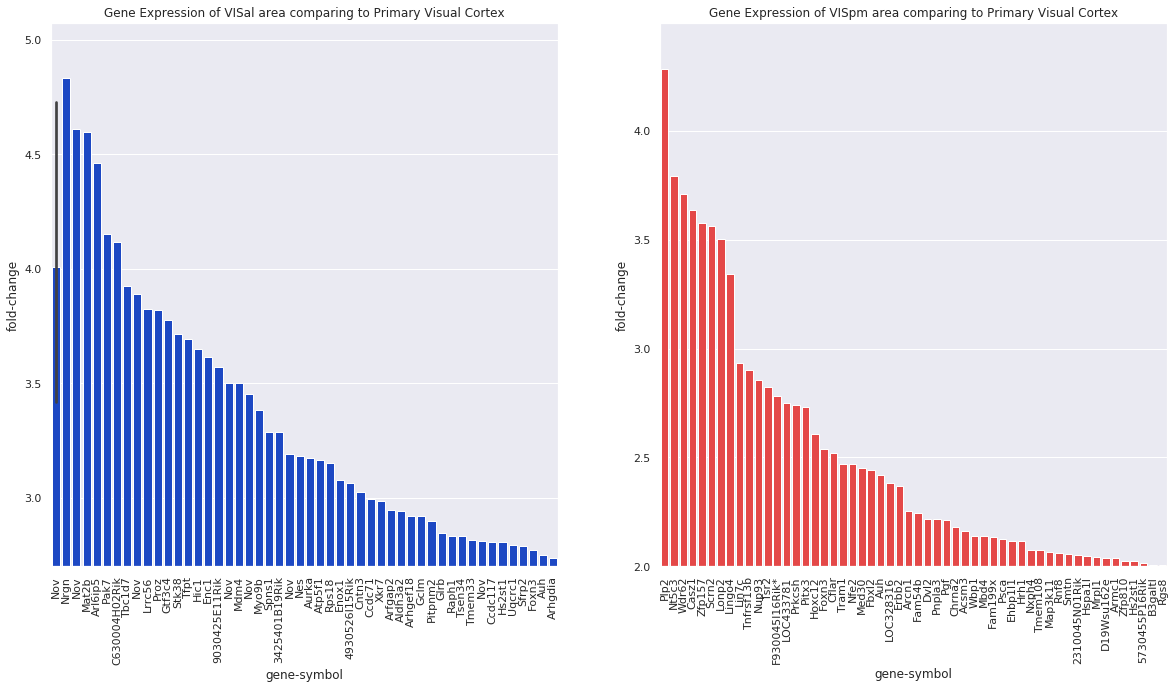

In [29]:
# plotting the gene expression data through barplot
fig, ax = plt.subplots(ncols = 2,figsize=(20,10))
NL_VISal_plot= NL_VISal_pd_fold[NL_VISal_pd_fold["fold-change"] > 2.7].copy()
NL_VISpm_plot = NL_VISpm_pd_fold[NL_VISpm_pd_fold["fold-change"] > 2].copy()

print("Num of gene plotted for VISal: " + str(len(NL_VISal_plot)))
print("Num of gene plotted for VISpm: " + str(len(NL_VISpm_plot)))

ax1 = sns.barplot(x = "gene-symbol", y = "fold-change", data = NL_VISal_plot, ax = ax[0], color='#013ADF')
ax1.set_xticklabels(labels = NL_VISal_plot['gene-symbol'], rotation=90)
ax1.set_ylim(2.7,)
ax1.set_title('Gene Expression of VISal area comparing to Primary Visual Cortex')

custom_palette = sns.color_palette("RdGy", 2)
ax2 = sns.barplot(x = "gene-symbol", y = "fold-change", data = NL_VISpm_plot, ax = ax[1], color='#FE2E2E' )
ax2.set_xticklabels(labels = NL_VISpm_plot['gene-symbol'], rotation=90)
ax2.set_ylim(2,)
ax2.set_title('Gene Expression of VISpm area comparing to Primary Visual Cortex')

**Figure 1**: The plot on the left shows the two extremes of gene expression from RNA sequence in the anterolateral area (AL) compared to the posteromedial area (PM). The plot on the left compared gene expression  posteromedial area (PM) to the anterolateral area (AL).

### 1.2 Further catergorizing the differential functional differences between VISal and VISPm using Gene Ontology

Isolate Entrez of all the genes identified in the ISH data

In [30]:
entrez_alpm = pd.DataFrame(VISal_VISpm_pd[['entrez-id']])
entrez_pmal = pd.DataFrame(VISpm_VISal_pd[['entrez-id']])
NL_VISal_pd.sort_values(by=['fold-change'], ascending = False)
NL_VISpm_pd.sort_values(by=['fold-change'], ascending = False)
entrez_nlal = pd.DataFrame(NL_VISal_pd[['entrez-id']])
entrez_nlpm = pd.DataFrame(NL_VISpm_pd[['entrez-id']])

Export entrez ID to .csv format, for further analysis 

In [31]:
entrez_alpm.to_csv("./entrez_alpm.csv", sep=',',index=False)
entrez_pmal.to_csv("./entrez_pmal.csv", sep=',',index=False)
entrez_nlal.to_csv("./entrez_nlal.csv", sep=',',index=False)
entrez_nlpm.to_csv("./entrez_nlpm.csv", sep=',',index=False)

## Place to insert DAVID analysis

### Cell Types Database: plotting resting potential of neurons VISal and VISpm areas

Text(0, 0.5, 'Resting Membrane Potential')

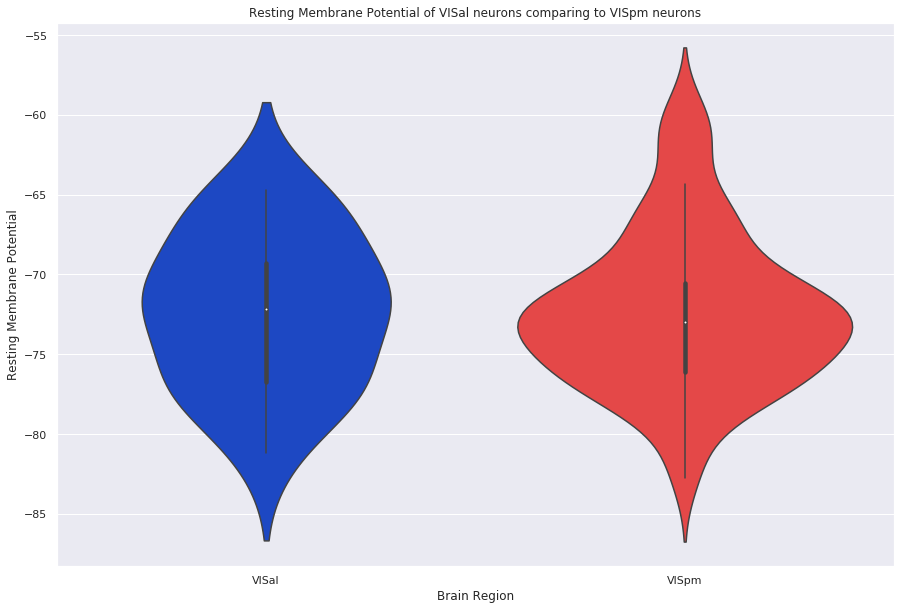

In [32]:
fig, ax1 = plt.subplots(ncols = 1, figsize=(15,10))
custom = ["#013ADF","#FE2E2E"]

sns.violinplot(y = 'Vrest', x = 'Brain Region', data = vrest, ax = ax1, palette = custom, orient = 'v')
ax1.set_title('Resting Membrane Potential of VISal neurons comparing to VISpm neurons')
ax1.set_ylabel('Resting Membrane Potential')

**Figure 2**: There are similarities  in the range between the resting membrane potentials. The anterolateral area neurons' interquartile range ranges from -66 mV to -77 mV, while the resting membrane potential of the posteromedial area neuron's is -70 mV to -77 mV.


### Looking into the electrophysiology data through PCA

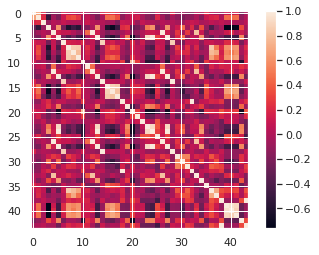

In [33]:
visalpm_cov = visalpm_ephys.cov()
plt.imshow(visalpm_cov)
plt.colorbar()

In [34]:
pca = PCA(n_components = 5)            
X_2D = pca.fit_transform(visalpm_ephys)   
visalpm_ephys_name['PC1'] = X_2D[:,0]
visalpm_ephys_name['PC2'] = X_2D[:,1]
visalpm_ephys_name['PC3'] = X_2D[:,2]
visalpm_ephys_name['PC4'] = X_2D[:,3]
visalpm_ephys_name['PC5'] = X_2D[:,4]

X_2D_ls = pca.fit_transform(visalpm_ephys.loc[:, ephys_list_long_square])   
visalpm_ephys_name['ls_PC1'] = X_2D_ls[:,0]
visalpm_ephys_name['ls_PC2'] = X_2D_ls[:,1]
visalpm_ephys_name['ls_PC3'] = X_2D_ls[:,2]
visalpm_ephys_name['ls_PC4'] = X_2D_ls[:,3]
visalpm_ephys_name['ls_PC5'] = X_2D_ls[:,4]

X_2D_ramp = pca.fit_transform(visalpm_ephys.loc[:, ephys_list_ramp])
visalpm_ephys_name['r_PC1'] = X_2D_ramp[:,0]
visalpm_ephys_name['r_PC2'] = X_2D_ramp[:,1]
visalpm_ephys_name['r_PC3'] = X_2D_ramp[:,2]
visalpm_ephys_name['r_PC4'] = X_2D_ramp[:,3]
visalpm_ephys_name['r_PC5'] = X_2D_ramp[:,4]

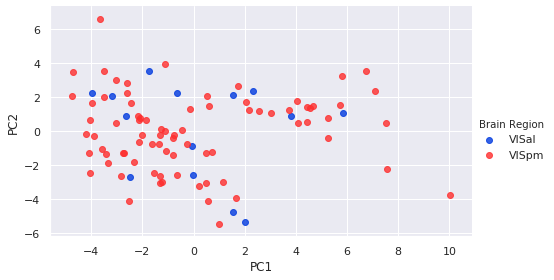

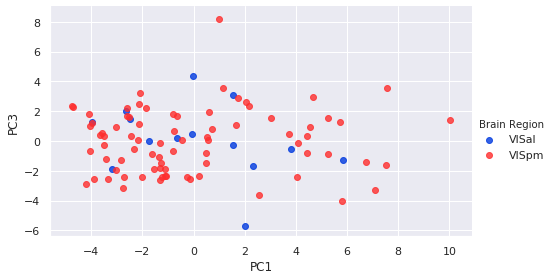

In [39]:
sns.lmplot("PC1", "PC2", hue ='Brain Region', palette = custom, data=visalpm_ephys_name, fit_reg=False, height = 4, aspect = 1.7)
sns.lmplot("PC1", "PC3", hue ='Brain Region', palette = custom, data=visalpm_ephys_name, fit_reg=False, height = 4, aspect = 1.7)

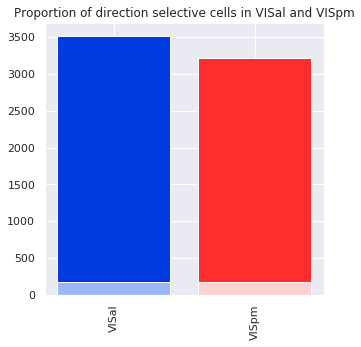

In [40]:
plt.figure(figsize = (5,5))


plt.bar(al_pm_sig['Brain Region'], al_pm_sig['Count'], color = ['#013ADF', '#FE2E2E'])
plt.bar(al_pm_d['Brain Region'], al_pm_d['Count'], color = ['#9ab8f9', '#ffd1d1'])
plt.xticks(rotation=90)
plt.title("Proportion of direction selective cells in VISal and VISpm")
plt.show()

### Plots for Direction selective cells

### Connectivity Database: Projection Matrix of VISal cells and VISpm cells

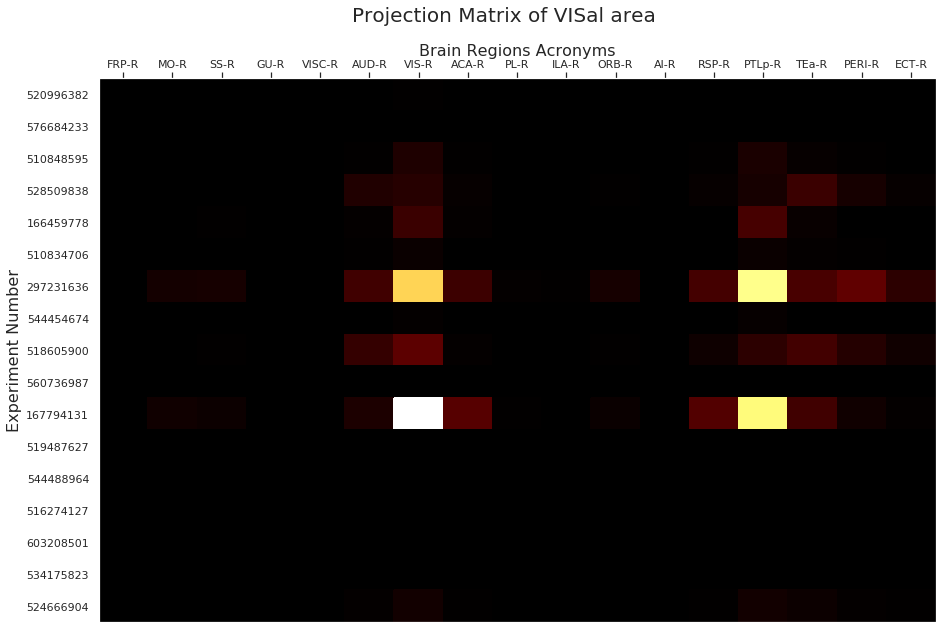

In [37]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

visal_experiment_ids = [ e['id'] for e in visal_experiments ]
ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

pm = mcc.get_projection_matrix(experiment_ids = visal_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,10))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.set_xlabel('Brain Regions Acronyms', fontsize=16)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Experiment Number', fontsize=16)
ax.yaxis.set_label_position('left') 
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
fig.suptitle('Projection Matrix of VISal area', fontsize=20)
plt.show()

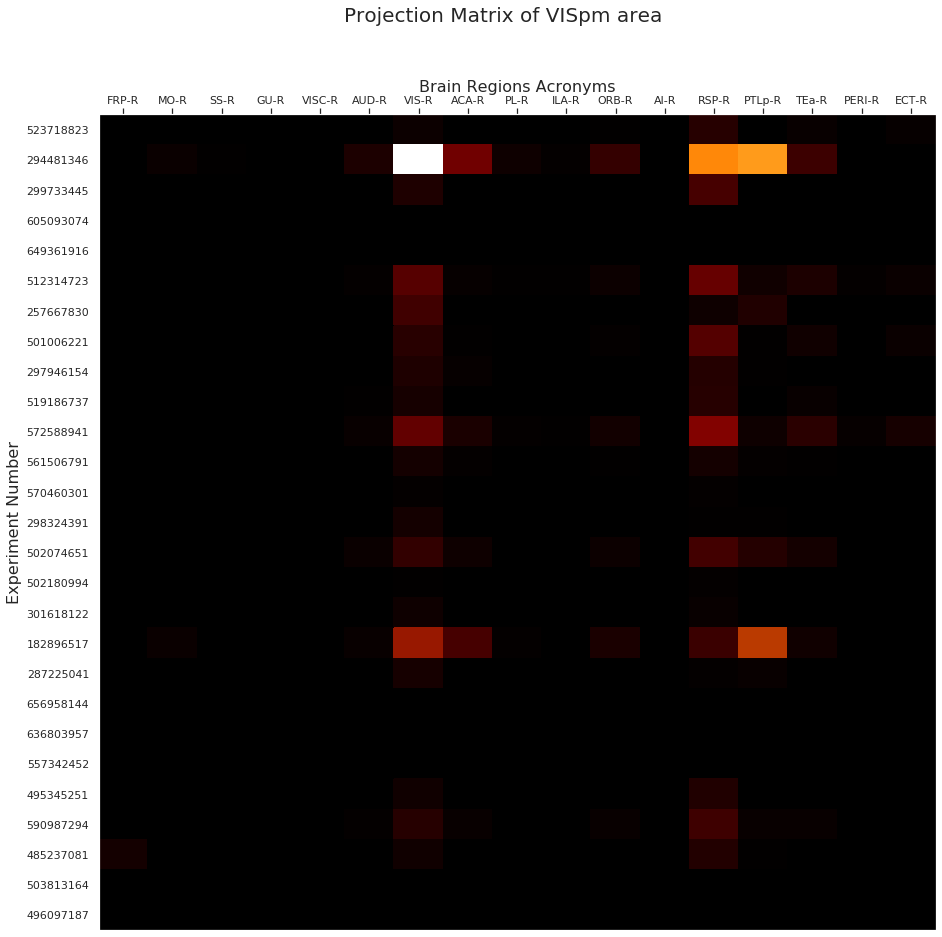

In [38]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

vispm_experiment_ids = [ e['id'] for e in vispm_experiments ]
ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

pm = mcc.get_projection_matrix(experiment_ids = vispm_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.set_xlabel('Brain Regions Acronyms', fontsize=16)
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Experiment Number', fontsize=16)
ax.yaxis.set_label_position('left') 
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
fig.suptitle('Projection Matrix of VISpm area', fontsize=20)


plt.show()

## **Conclusion & Discussion**
When comparing the gene expression of VISpm to the VISal area, it is apparent that the genes Cacna 2D2, Aqp4, and AbcB6 are expressed much more in the VISpm area than in the VISal area. All three of these genes play an integral role in the transport of molecules and ions into and out of the cell. More specifically, Cacna 2D2 encodes for a subunit of the calcium channel complex that allows for calcium to flood into the cell, Aqp4 encodes for an aquaporin protein that allows for water to be selective allowed into the cell, and AbcB6 encodes an ATP transporter. We hypothesize that this abundance of transport genes in the VISpm point to the fact that these neurons are more active, as more transporters are required for neurons that transport molecules into/out of the cell. This gene expression data that has been collected may provide some insight as to why the findings of Anderman et al indicates that the VISpm is responsible for guiding behavior involving slow moving objects. This may be because when we observe slow moving stimuli, we are able to analyze the various attributes of the stimuli such as shape, color, and size and give it greater visual acuity, however we are not able to do so with fast moving stimuli. In order to analyze the various attributes of slow moving stimuli, we must have genes that will allow for the neurons that analyze slow moving stimuli to have greater activity. This is why the VISpm area contains the transporter coding genes: Cacna 2D2, Aqp4, and AbcB6 that will allow for the neurons in the VISpm area to be more active and functionally specialized in that it controls behavior in response to slow moving stimuli. On the other hand, the genes that were highly expressed in the VISal area in comparison to the VISpm area were genes that did not play a significant role in the visual system and perception, these genes were Enc1, Sbf1, and Rfx1.

Moving on, when comparing the resting membrane potential of the VISal and VISpm areas, we find them to be similar. The anterolateral area neurons have a median resting membrane potential of -71mV, while the median resting membrane potential of the posteromedial area neurons are -72. Although the VISal and VISpm are functionally specialized in two different areas, they are both located within the visual cortex of the brain which is likely why the resting membrane potentials are so similar. The functional specialization of the neurons has not impacted the resting potentials of the neurons very much. 

Adding on to the electrophysiology of the VISal and VISpm areas, we observed that the trend between the fast trough depth vs. the upstroke-downstroke ratio of the two areas are very similar as well. The fast trough depth is the minimum value of the membrane potential in the interval lasting 5 ms after the peak, while the upstroke-downstroke ratio is the ratio between the absolute values of the action potential peak upstroke and the action potential peak downstroke. In both areas of the brain, we observed a positive correlation between these two variables. In other words, when the upstroke of the action potential is larger than the downstroke, then the neuron will be more depolarized up to 5ms after the peak. Once again, athough the VISal and VISpm are functionally specialized in two different areas, they are both located within the visual cortex of the brain which is likely why the trend of fast trough depth vs. the upstroke-downstroke ratio of the two areas are very similar.

Finally, the anterolateral area and the posteromedial area of the visual cortex have a similar number of neurons that have a significant response to drifting gratings and a similar number of neurons that are direction selective. There are 7191 cells in the anterolateral area with 48.9% of them having a significant response to drifting gratings and 2.3% of them are direction selective. On the other hand, there are 7985 cells in the posterolateral visual area with 40.3% of them having a significant response to drifting gratings and 2.1% if them are direction selective.

## **Limitations**
In our experiment we only focused on mice. Although mice are good model organisms for the visual system, mice lack the cortical regions compared to humans and other primates. As a result, the result can not extrapolate visual processing for humans . For the violin plot (Figure 2), the differences in shape arises from the number of neurons; AL had less cells compared to PL . This finding will lead to the difference in shape. We only looked at electrophysical physiology properties and gene expression and did not look at connectivity to the V1. 

## **Future Direction**
A future direction for this project is to look at the connectivity of these two regions.Connectivity could lead to functional specialization of a cortical region.  We need images from calcium imaging or fMRI to draw conclusions. We can look at the cre lines or a CRISPR knockout with genes highly expressed and barely expressed respectivley to see which one is linked to functional specialization of each regions. We need to data from single cells RNA sequence.
